# Project Notebook: The Linear Regression Model

## 1. Introduction

We started by building intuition for model based learning, explored how the linear regression model worked, understood how the two different approaches to model fitting worked, and some techniques for cleaning, transforming, and selecting features. In this project, you can practice what you learned by exploring ways to improve the models we built.

You'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. You can also read about the different columns in the data [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

Let's start by setting up a pipeline of functions that will let us quickly iterate on different models.

**Tasks**

1. Import pandas, matplotlib, and numpy into the environment. Import the classes you need from scikit-learn as well.
2. Read `AmesHousing.tsv` () into a pandas data frame.
3. For the following functions, we recommend creating them in the first few cells in the notebook. This way, you can add cells to the end of the notebook to do experiments and update the functions in these cells.
* Create a function named `transform_features()` that, for now, just returns the train data frame.
* Create a function named `select_features()` that, for now, just returns the Gr Liv Area and SalePrice columns from the train data frame.
* Create a function named `train_and_test()` that, for now:

1. Selects the first 1460 rows from from data and assign to train.
2. Selects the remaining rows from data and assign to test.
3. Trains a model using all numerical columns except the SalePrice column (the target column) from the data frame returned from `select_features()`
4. Tests the model on the test set and returns the `RMSE` value.

In [45]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [46]:
AmesHousing = pd.read_csv("https://bit.ly/3boZCX4",delimiter="\t")
AmesHousing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [47]:
# Create a function named transform_features() that, for now, just returns the train data frame.
def transform_features(AmesHousing):
    return AmesHousing

# Create a function named select_features() that, for now, just returns the Gr Liv Area and SalePrice columns from the train data frame.
def select_features(AmesHousing):
    return AmesHousing[['Gr Liv Area','SalePrice']]

#Create a function named train_and_test():#
#Selects the first 1460 rows from from data and assign to train.
#Selects the remaining rows from data and assign to test.
def train_and_test(AmesHousing):
    train = AmesHousing[:1460]
    test = AmesHousing[1460:]    

#selecting numeric columns
    train_numeric = train.select_dtypes (include= ['float','integer'])
    test_numeric = test.select_dtypes (include= ['float', 'integer'])
    # print(train_numeric)
    # print(test_numeric)

#selecting features and target
    features_train = train_numeric.columns.drop('SalePrice')
    features_test = test_numeric.columns.drop('SalePrice')
    target = 'SalePrice'
    # print(features)
    # print(target)

    # model
    model = LinearRegression()

    #fitting the model
    model.fit(train[features_train], train[target])

    #prediction
    predictions = model.predict(test[features_test])

    # Calculating MSE and RMSE
    mse = mean_squared_error(test[target], predictions)
    rmse = np.sqrt(mean_squared_error(test[target], predictions))
    return rmse

transform_df = transform_features(AmesHousing)
features_df = select_features(transform_df)
rmse = train_and_test(features_df)
print(rmse)

57088.25161263909


## 2. Feature Engineering

Let's now start removing features with many missing values, diving deeper into potential categorical features, and transforming text and numerical columns. Update `transform_features()` so that any column from the data frame with more than 25% (or another cutoff value) missing values is dropped. You also need to remove any columns that leak information about the sale (e.g. like the year the sale happened). In general, the goal of this function is to:

* remove features that we don't want to use in the model, just based on the number of missing values or data leakage.
* transform features into the proper format (numerical to categorical, scaling numerical, filling in missing values, etc).
* create new features by combining other features.

Next, you need to get more familiar with the remaining columns by reading the data documentation for each column, determining what transformations are necessary (if any), and more. As we mentioned earlier, succeeding in predictive modeling (and competitions like Kaggle) is highly dependent on the quality of features the model has. Libraries like scikit-learn have made it quick and easy to simply try and tweak many different models, but cleaning, selecting, and transforming features are still more of an art that requires a bit of human ingenuity.

**Tasks**

1. As we mentioned earlier, we recommend adding some cells to explore and experiment with different features (before rewriting these functions).

2. The `transform_features()` function shouldn't modify the train data frame and instead return a new one entirely. This way, we can keep using train in the experimentation cells.

3. Which columns contain less than 5% missing values?
* For numerical columns that meet this criteria, let's fill in the missing values using the most popular value for that column.

4. What new features can we create, that better capture the information in some of the features?
* An example of this would be the `years_until_remod` feature we created in the last lesson.

5. Which columns need to be dropped for other reasons?
* Which columns aren't useful for machine learning?
* Which columns leak data about the final sale?

In [48]:
#cheking the missing values
missing_count = AmesHousing.isnull().sum().sort_values(ascending = False),
missing_count

(Pool QC           2917
 Misc Feature      2824
 Alley             2732
 Fence             2358
 Fireplace Qu      1422
                   ... 
 1st Flr SF           0
 Central Air          0
 Heating QC           0
 Sale Condition       0
 Order                0
 Length: 82, dtype: int64,)

In [49]:
 #Columns with numerical values
 numerical_columns = AmesHousing.select_dtypes (include= ['float','integer'])
 numerical_columns

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,1984.0,2.0,588.0,120,0,0,0,0,0,0,3,2006,142500
2926,2927,923276100,20,NaN,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,1983.0,2.0,484.0,164,0,0,0,0,0,0,6,2006,131000
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006,132000
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,1975.0,2.0,418.0,240,38,0,0,0,0,0,4,2006,170000


In [50]:
#checking missing values in the numerical columns
numerical_missing = numerical_columns.isnull().sum().sort_values(ascending = False)
numerical_missing

Lot Frontage       490
Garage Yr Blt      159
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Garage Area          1
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Low Qual Fin SF      0
MS SubClass          0
PID                  0
1st Flr SF           0
2nd Flr SF           0
SalePrice            0
Gr Liv Area          0
Open Porch SF        0
Mo Sold              0
Misc Val             0
Pool Area            0
Screen Porch         0
3Ssn Porch           0
Enclosed Porch       0
Wood Deck SF         0
Yr Sold              0
Fireplaces           0
TotRms AbvGrd        0
Kitchen AbvGr        0
Bedroom AbvGr        0
Half Bath            0
Full Bath            0
Order                0
dtype: int64

In [51]:
#missing values less than 5% 
numerical_low_missing = numerical_missing[(numerical_missing/len(numerical_columns) < .05)]
print(numerical_low_missing.sort_values(ascending=False))

Mas Vnr Area       23
Bsmt Half Bath      2
Bsmt Full Bath      2
BsmtFin SF 2        1
Total Bsmt SF       1
Bsmt Unf SF         1
Garage Area         1
BsmtFin SF 1        1
Garage Cars         1
1st Flr SF          0
Lot Area            0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Low Qual Fin SF     0
MS SubClass         0
PID                 0
Order               0
Full Bath           0
SalePrice           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
TotRms AbvGrd       0
Fireplaces          0
Yr Sold             0
Wood Deck SF        0
Enclosed Porch      0
3Ssn Porch          0
Screen Porch        0
Pool Area           0
Misc Val            0
Mo Sold             0
Open Porch SF       0
Gr Liv Area         0
2nd Flr SF          0
dtype: int64


In [52]:
#finding the mode in the numerical columns with more missing values more than 5%
cols_mode=AmesHousing.filter(["Mas Vnr Area", "Bsmt Half Bath","Bsmt Full Bath","BsmtFin SF 2","Total Bsmt SF","Bsmt Unf SF","Garage Area","BsmtFin SF 1","Garage Cars"]).mode()

#imputing the missing values with the mode
AmesHousing[["Mas Vnr Area", "Bsmt Half Bath","Bsmt Full Bath","BsmtFin SF 2","Total Bsmt SF","Bsmt Unf SF","Garage Area","BsmtFin SF 1","Garage Cars"]]=AmesHousing[["Mas Vnr Area", "Bsmt Half Bath","Bsmt Full Bath","BsmtFin SF 2","Total Bsmt SF","Bsmt Unf SF","Garage Area","BsmtFin SF 1","Garage Cars"]].fillna(value=cols_mode.iloc[0])
AmesHousing.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [53]:
#dropping numerical columns within more than 5% missing values
numerical_high_missing = numerical_missing[(numerical_missing/len(numerical_columns) > .05)]
print(numerical_high_missing.sort_values(ascending=False))

AmesHousing=AmesHousing.drop(['Lot Frontage','Garage Yr Blt'],axis=1)
AmesHousing

Lot Frontage     490
Garage Yr Blt    159
dtype: int64


,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,

In [54]:
# dropping text columns with missing values
text_cols = AmesHousing.select_dtypes(include=['object']).columns
missingtxt = AmesHousing[text_cols].isnull().sum()
missing_textcol = missingtxt[missingtxt >= 1].index
AmesHousing = AmesHousing.drop(missing_textcol, axis=1)

In [55]:
AmesHousing.isnull().sum()

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Area          0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 64, dtype: int64

In [56]:
# creating a new feature to indicate the number of years it takes to sell a house
AmesHousing['years_to_sale'] = AmesHousing['Yr Sold'] - AmesHousing['Year Built']

# checking for negative values
years= AmesHousing['years_to_sale']
years[years<0]

2180   -1
Name: years_to_sale, dtype: int64

In [57]:
# creating a new feature to indicate the number of years to renovation
AmesHousing['years_to_remod'] = AmesHousing['Yr Sold'] - AmesHousing['Year Remod/Add']

# checking for negative values
remod_yrs = AmesHousing['years_to_remod']
remod_yrs[remod_yrs<0]

1702   -1
2180   -2
2181   -1
Name: years_to_remod, dtype: int64

In [58]:
# dropping the records with negative values from years to sale and remodel above
AmesHousing = AmesHousing.drop([2180, 1702, 2180, 2181], axis=0)

# removing columns no longer needed
AmesHousing = AmesHousing.drop(['Yr Sold', 'Year Remod/Add', 'Year Built'], axis=1)

In [59]:
#Other columns to drop
# 1.columns that aren't useful for machine learning
# 2.columns that leak data about the final sale


#columns not useful for the model: PID(Place ID) and order
AmesHousing = AmesHousing.drop(['PID', 'Order'], axis=1)

#columns that leak data about the final sale;
# 1.Mo Sold: Month Sold (MM)
# 2.Sale Type: Type of sale
		
#        WD 	Warranty Deed - Conventional
#        CWD	Warranty Deed - Cash
#        VWD	Warranty Deed - VA Loan
#        New	Home just constructed and sold
#        COD	Court Officer Deed/Estate
#        Con	Contract 15% Down payment regular terms
#        ConLw	Contract Low Down payment and low interest
#        ConLI	Contract Low Interest
#        ConLD	Contract Low Down
#        Oth	Other
# 3.Sale Condition: Condition of sale

#        Normal	Normal Sale
#        Abnorml	Abnormal Sale -  trade, foreclosure, short sale
#        AdjLand	Adjoining Land Purchase
#        Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
#        Family	Sale between family members
#        Partial	Home was not completed when last assessed (associated with New Homes)

AmesHousing = AmesHousing.drop(['Mo Sold', 'Sale Type', 'Sale Condition'], axis=1)


In [60]:
def transform_features(AmesHousing):
    # imputing missing values with the mode
    AmesHousing[["Mas Vnr Area", "Bsmt Half Bath","Bsmt Full Bath","BsmtFin SF 2","Total Bsmt SF","Bsmt Unf SF","Garage Area","BsmtFin SF 1","Garage Cars"]]=AmesHousing[["Mas Vnr Area", "Bsmt Half Bath","Bsmt Full Bath","BsmtFin SF 2","Total Bsmt SF","Bsmt Unf SF","Garage Area","BsmtFin SF 1","Garage Cars"]].fillna(value=cols_mode.iloc[0])
    AmesHousing.head()

    #dropping numerical columns within more than 5% missing values
    numerical_missing = numerical_columns.isnull().sum().sort_values(ascending = False)
    numerical_missing
    numerical_high_missing = numerical_missing[(numerical_missing/len(numerical_columns) > .05)]
    AmesHousing=AmesHousing.drop(['Lot Frontage','Garage Yr Blt'],axis=1)
    
    
    # dropping text columns with missing values
    text_cols = AmesHousing.select_dtypes(include=['object']).columns
    missingtxt = AmesHousing[text_cols].isnull().sum()
    missing_textcol = missingtxt[missingtxt >= 1].index
    AmesHousing = AmesHousing.drop(missing_textcol, axis=1)

    
    # creating a new feature to indicate the number of years it takes to sell a house
    AmesHousing['years_to_sale'] = AmesHousing['Yr Sold'] - AmesHousing['Year Built']

    # checking for negative values
    years= AmesHousing['years_to_sale']
    years[years<0]

    # creating a new feature to indicate the number of years to renovation
    AmesHousing['years_to_remod'] = AmesHousing['Yr Sold'] - AmesHousing['Year Remod/Add']

    # checking for negative values
    remod_yrs = AmesHousing['years_to_remod']
    remod_yrs[remod_yrs<0]
    
    # dropping the records with negative values from years to sale and remodel above
    AmesHousing = AmesHousing.drop([2180, 1702, 2180, 2181], axis=0)

    # removing columns no longer needed
    AmesHousing = AmesHousing.drop(['Yr Sold', 'Year Remod/Add', 'Year Built'], axis=1)

    #columns not useful for the model: PID(Place ID) and order
    AmesHousing = AmesHousing.drop(['PID', 'Order'], axis=1)

    #columns that leak data about the final sale
    AmesHousing = AmesHousing.drop(['Mo Sold', 'Sale Type', 'Sale Condition'], axis=1)

    return AmesHousing


def train_and_test(AmesHousing):
    train = AmesHousing[:1460]
    test = AmesHousing[1460:]    

#selecting numeric columns
    train_numeric = train.select_dtypes (include= ['float','integer'])
    test_numeric = test.select_dtypes (include= ['float', 'integer'])
    # print(train_numeric)
    # print(test_numeric)

#selecting features and target
    features_train = train_numeric.columns.drop('SalePrice')
    features_test = test_numeric.columns.drop('SalePrice')
    target = 'SalePrice'
    # print(features)
    # print(target)

    # model
    model = LinearRegression()

    #fitting the model
    model.fit(train[features_train], train[target])

    #prediction
    predictions = model.predict(test[features_test])

    # Calculating MSE and RMSE
    mse = mean_squared_error(test[target], predictions)
    rmse = np.sqrt(mean_squared_error(test[target], predictions))
    return rmse

AmesHousing = pd.read_csv("https://bit.ly/3boZCX4",delimiter="\t")
transform_df = transform_features(AmesHousing)
features_df = select_features(transform_df)
rmse = train_and_test(features_df)
print(rmse)


55275.36731241307


## 3. Feature Selection

Now that we have cleaned and transformed a lot of the features in the data set, it's time to move on to feature selection for numerical features.

**Tasks**

1. Generate a correlation heatmap matrix of the numerical features in the training data set.
* Which features correlate strongly with our target column, `SalePrice`?
* Calculate the correlation coefficients for the columns that seem to correlate well with `SalePrice`. Because we have a pipeline in place, it's easy to try different features and see which features result in a better cross validation score.

2. Which columns in the data frame should be converted to the categorical data type? All of the columns that can be categorized as nominal variables are candidates for being converted to categorical. Here are some other things you should think about:
* If a categorical column has hundreds of unique values (or categories), should you keep it? When you dummy code this column, hundreds of columns will need to be added back to the data frame.
* Which categorical columns have a few unique values but more than 95% of the values in the column belong to a specific category? This would be similar to a low variance numerical feature (no variability in the data for the model to capture).

3. Which columns are currently numerical but need to be encoded as categorical instead (because the numbers don't have any semantic meaning)?

4. What are some ways we can explore which categorical columns "correlate" well with `SalePrice`?

5. Update the logic for the `select_features()` function. This function should take in the new, modified train and test data frames that were returned from `transform_features()`.

In [61]:
corrnum= transform_df.corr()['SalePrice'].abs()
print(corrnum.sort_values(ascending=False))

SalePrice          1.000000
Overall Qual       0.801206
Gr Liv Area        0.717596
Garage Cars        0.648361
Total Bsmt SF      0.644012
Garage Area        0.641425
1st Flr SF         0.635185
years_to_sale      0.558979
Full Bath          0.546118
years_to_remod     0.534985
Mas Vnr Area       0.506983
TotRms AbvGrd      0.498574
Fireplaces         0.474831
BsmtFin SF 1       0.439284
Wood Deck SF       0.328183
Open Porch SF      0.316262
Half Bath          0.284871
Bsmt Full Bath     0.276258
2nd Flr SF         0.269601
Lot Area           0.267520
Bsmt Unf SF        0.182751
Bedroom AbvGr      0.143916
Enclosed Porch     0.128685
Kitchen AbvGr      0.119760
Screen Porch       0.112280
Overall Cond       0.101540
MS SubClass        0.085128
Pool Area          0.068438
Low Qual Fin SF    0.037629
Bsmt Half Bath     0.035875
3Ssn Porch         0.032268
Misc Val           0.019273
BsmtFin SF 2       0.006127
Name: SalePrice, dtype: float64


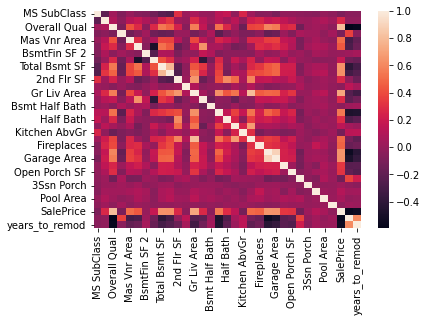

In [62]:
corr_num = transform_df[corrnum.index]

sns.heatmap(corr_num.corr())

In [63]:
#filtering columns with correlation greater than 4
corrnum = corrnum[corrnum > 0.4] 
corrnum

Overall Qual      0.801206
Mas Vnr Area      0.506983
BsmtFin SF 1      0.439284
Total Bsmt SF     0.644012
1st Flr SF        0.635185
Gr Liv Area       0.717596
Full Bath         0.546118
TotRms AbvGrd     0.498574
Fireplaces        0.474831
Garage Cars       0.648361
Garage Area       0.641425
SalePrice         1.000000
years_to_sale     0.558979
years_to_remod    0.534985
Name: SalePrice, dtype: float64

In [64]:
# dropping columns with correlation less than 0.4
transform_df = transform_df.drop(corrnum[corrnum < 0.4].index, axis=1)


## 4. Train and Test

Now for the final part of the pipeline, training and testing. When iterating on different features, using simple validation is a good idea. Let's add a parameter named `k` that controls the type of cross validation that occurs.

**Tasks**

1. The optional `k` parameter should accept integer values, with a default value of `0`.

2. When `k` equals `0`, perform holdout validation (what we already implemented):

* Select the first `1460` rows and assign to `train`.
* Select the remaining rows and assign to test.
* Train on `train` and `test` on test.
* Compute the `RMSE` and return.

3. When k equals 1, perform simple cross validation:

* Shuffle the ordering of the rows in the data frame.
* Select the first 1460 rows and assign to `fold_one`.
* Select the remaining rows and assign to `fold_two`.
* Train on `fold_one` and test on `fold_two`.
* Train on `fold_two` and test on `fold_one`.
* Compute the average RMSE and return.

4. When `k` is greater than `0`, implement k-fold cross validation using `k` folds:

* Perform `k-fold` cross validation using k folds.
* Calculate the average `RMSE` value and return this value.

In [65]:
def train_and_test(AmesHousing, k=0):
    numeric_df = AmesHousing.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop('SalePrice')
    target = 'SalePrice'
    lr = LinearRegression()
    if k == 0:
      train = AmesHousing[:1460]
      test = AmesHousing[1460:]
      lr.fit(train[features], train[target])
      predictions1 = lr.predict(test[features])
      mse1 = mean_squared_error(test[target], predictions1)
      rmse1 = np.sqrt(mse1)
      return rmse1
    if k == 1: 
       shuffled_df = df.sample(frac=1,)
       fold_one = AmesHousing[:1460]
       fold_two = AmesHousing[1460:]
       lr.fit(fold_one[features], fold_one[target])
       predictions2 = lr.predict(fold_two[features])
       mse2 = mean_squared_error(fold_two[target], predictions2)
       rmse2 = np.sqrt(mse2)
       average_rmse = np.mean([rmse1, rmse2])
       print('rmse1:', rmse1)
       print('rmse2:', rmse2)
       print('average_rmse:', average_rmse)
    else: 
       kf = KFold(n_splits=k, shuffle=True)
       rmse_values = []
       for train_index, test_index, in kf.split(AmesHousing):
           train = AmesHousing.iloc[train_index]
           test = AmesHousing.iloc[test_index]
           lr.fit(train[features], train[target])
           predictions = lr.predict(test[features])
           mse = mean_squared_error(test[target], predictions)
           rmse = np.sqrt(mse)
           rmse_values.append(rmse)
       print(rmse_values)
       average_rmse = np.mean(rmse_values)
       return average_rmse
AmesHousing = pd.read_csv("https://bit.ly/3boZCX4",delimiter="\t")       
transform_df = transform_features(AmesHousing)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=5)
print(rmse)

[49890.27813549413, 54132.59642205297, 56403.805986374085, 59736.72748738754, 58456.9636869612]
55724.07434365399


## 5. Next Steps

That's it for the guided steps. Here's some potenial next steps that you can take:

1. Continue iteration on feature engineering:
* Research some other approaches to feature engineering online around housing data.
* Visit the Kaggle kernels [page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels) page for this dataset to see approaches others took.

2. Improve your feature selection:
* Research ways of doing feature selection better with categorical columns (something we didn't cover in this particular course).